# TD2

## Exercice 2

In [26]:
import pandas as pd  # type: ignore
import numpy as np  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore

df = pd.read_csv('ex2.csv')
df

,Couleur,Taille,Poids,Classe
0,Brun,145,45,F
1,Blond,160,50,F
2,Blond,150,60,H
3,Blond,185,85,H
4,Brun,180,90,H
5,Noir,165,55,F
6,Noir,175,80,F
7,Brun,155,90,F
8,Noir,160,65,H


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Couleur  9 non-null      object
 1   Taille   9 non-null      int64 
 2   Poids    9 non-null      int64 
 3   Classe   9 non-null      object
dtypes: int64(2), object(2)
memory usage: 420.0+ bytes


In [12]:
df_encoded = pd.get_dummies(df, columns=["Classe"], prefix="Classe", drop_first=True, dtype= "int")
df_encoded

,Couleur,Taille,Poids,Classe_H
0,Brun,145,45,0
1,Blond,160,50,0
2,Blond,150,60,1
3,Blond,185,85,1
4,Brun,180,90,1
5,Noir,165,55,0
6,Noir,175,80,0
7,Brun,155,90,0
8,Noir,160,65,1


In [ ]:
# taille = df_encoded["Taille"].to_list()
# classe = df_encoded["Classe_H"].to_list()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6136\980000679.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


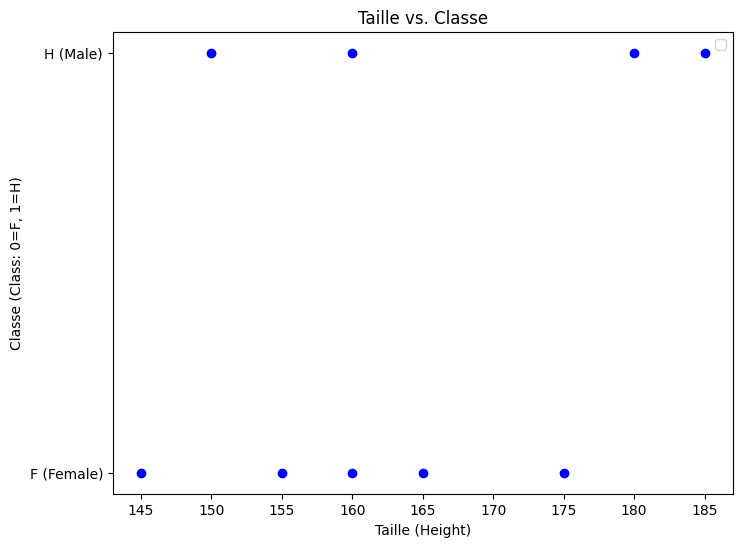

In [ ]:
# plt.figure(figsize=(8, 6))
# plt.scatter(taille, classe, color='blue', marker='o')
# plt.xlabel('Taille (Height)')
# plt.ylabel('Classe (Class: 0=F, 1=H)')
# plt.title('Taille vs. Classe')
# plt.yticks([0, 1], labels=['F (Female)', 'H (Male)'])
# # plt.grid(True)
# plt.legend()
# plt.show()

In [36]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['Couleur', 'Classe']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
    
X = df[["Couleur", "Taille", "Poids"]]
y = df["Classe"]

In [33]:
dtc = DecisionTreeClassifier(criterion="entropy", random_state=0)
dtc.fit(X, y)
tree_rules = export_text(dtc, feature_names=["Couleur", "Taille", "Poids"])
print("Decision Tree Rules:\n")
print(tree_rules)

Decision Tree Rules:

|--- Poids <= 57.50
|   |--- class: 0
|--- Poids >  57.50
|   |--- Poids <= 72.50
|   |   |--- class: 1
|   |--- Poids >  72.50
|   |   |--- Taille <= 177.50
|   |   |   |--- class: 0
|   |   |--- Taille >  177.50
|   |   |   |--- class: 1



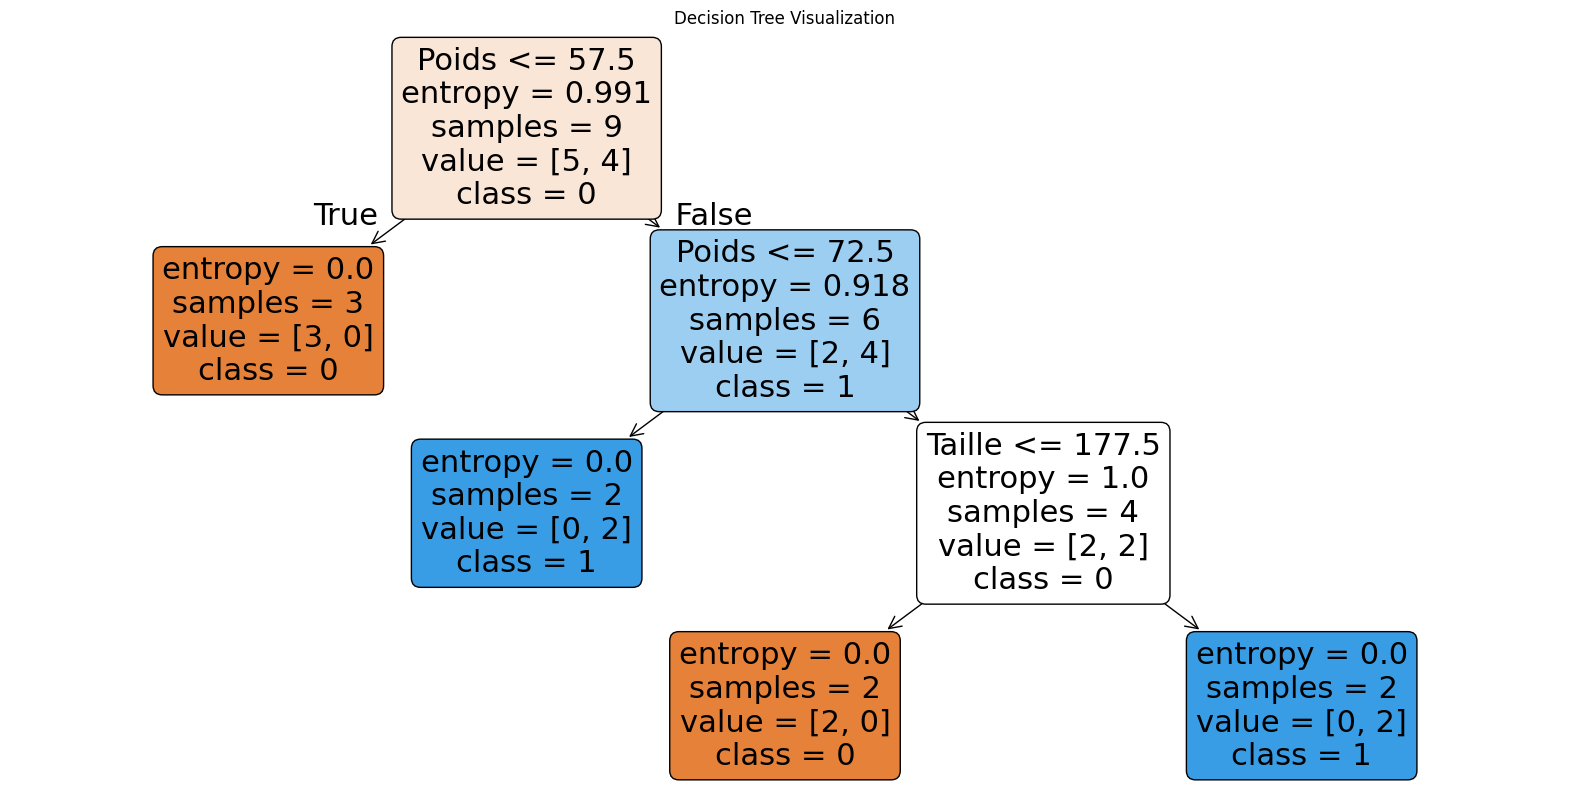

In [42]:
class_names = [str(cls) for cls in label_encoders["Classe"].classes_]

plt.figure(figsize=(20, 10))
plot_tree(
    dtc,
    feature_names=["Couleur", "Taille", "Poids"],
    class_names=class_names,
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()

In [30]:
sample = [[0, 170, 85]]  # Sample: Couleur = Brun, Taille = 170, Poids = 85
prediction = dtc.predict(sample)
predicted_class = label_encoders["Classe"].inverse_transform(prediction)[0]
print(f"\nPredicted Class for sample {sample}: {predicted_class}")


Predicted Class for sample [[0, 170, 85]]: F


c:\Users\ASUS\anaconda3\envs\env_ML\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Exercice 3
Plot:


In [ ]:

dataset = pd.read_csv('ex3.csv')
dataset.head(10)

,age,cholestrol,stroke
0,2.0,1.0,0
1,4.0,1.5,1
2,3.0,1.0,0
3,3.5,0.5,0
4,2.0,0.5,0
5,2.0,0.5,0
6,5.5,1.0,1
7,1.0,1.0,0


In [3]:
dataset_corr = dataset.corr()
dataset_corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,age,cholestrol,stroke
age,1.00,0.32,0.81
cholestrol,0.32,1.00,0.65
stroke,0.81,0.65,1.00


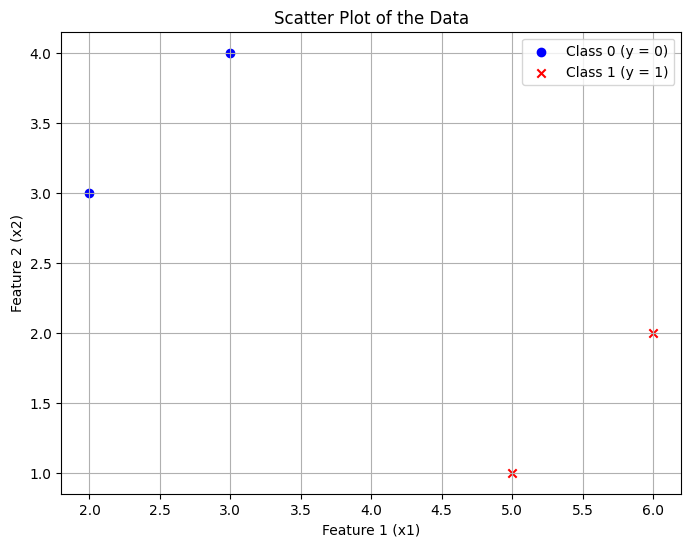

In [12]:
import matplotlib.pyplot as plt

# Define the dataset
x1 = [2.0, 3.0, 5.0, 6.0]  # Feature 1 (x1)
x2 = [3.0, 4.0, 1.0, 2.0]  # Feature 2 (x2)
y = [0, 0, 1, 1]           # Class labels

# Separate the data points by class
x1_class0 = [x1[i] for i in range(len(y)) if y[i] == 0]
x2_class0 = [x2[i] for i in range(len(y)) if y[i] == 0]

x1_class1 = [x1[i] for i in range(len(y)) if y[i] == 1]
x2_class1 = [x2[i] for i in range(len(y)) if y[i] == 1]

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(x1_class0, x2_class0, color='blue', label='Class 0 (y = 0)', marker='o')
plt.scatter(x1_class1, x2_class1, color='red', label='Class 1 (y = 1)', marker='x')

# Add labels and title
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('Scatter Plot of the Data')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
